# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos aquí

df = pd.read_csv('/work/largest_us_retailers.csv');
df['Category'] = df['Category'].replace([None], 'Electronic/Mail Order')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

#### 1. Primero debemos responder a la pregunta ¿Quién es la compañía dominante en ventas?

In [ ]:
df_sorted = df.sort_values('Sales', ascending=0)
top_5_sold_companies = df_sorted[0:5] #Mostramos las primeras 5 compañías con más ventas.
top_5_sold_companies

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


#### 2. Podemos ver que Walmart US lidera en ventas. Realizamos una visualización para enfatizar este punto.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


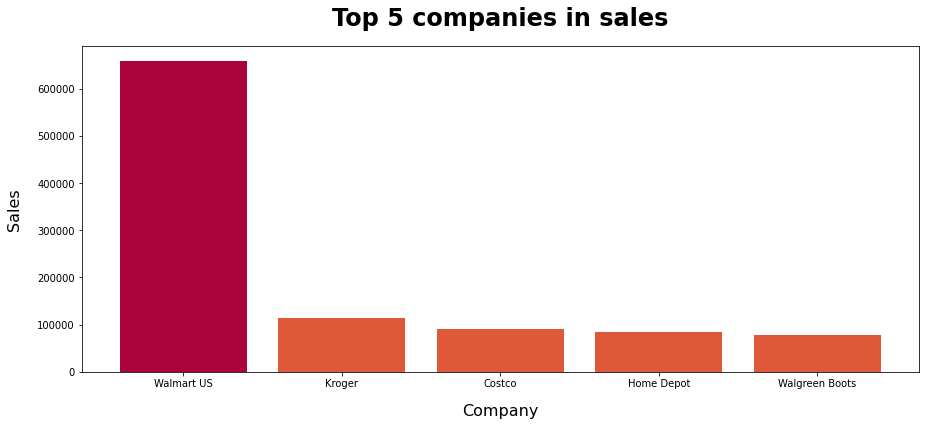

In [ ]:
plt.figure(figsize=(15,6))
colors = ['#AA023A', '#DF5838', '#DF5838', '#DF5838', '#DF5838']
plt.bar(x=top_5_sold_companies['Company'], height=top_5_sold_companies['Sales'], align='center', color=colors)
plt.title('Top 5 companies in sales', family='avenir', weight="bold", size=24, pad=20)
plt.xlabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 3. Sabiendo cual es la compañía que más ventas realiza, lo descartamos para realizar nuestro cálculo y evitar un sesgo del promedio.

In [ ]:
companies_without_walmart = df_sorted[1:]
companies_without_walmart

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


#### 4. Calculamos el promedio de ventas.

In [ ]:
promedio_ventas = int(companies_without_walmart['Sales'].mean()) #Parseamos a int para forzar el resultado a un número entero ya que no pueden haber ventas fraccionadas.

print('El promedio de ventas excluyendo Walmart es de ', promedio_ventas, ' unidades vendidas.')

El promedio de ventas excluyendo Walmart es de  46602  unidades vendidas.


#### 5. Finalmente llegamos a que el promedio de ventas es de 46602 unidades.

#### Conclusiones:

- 🛒 El promedio de ventas, excluyendo a la compañía dominante, es de **46602** unidades. 

- 🥇 Considerando la amplia diferencia de ventas que hay entre el primer y segundo lugar, podemos afirmar que **Walmart es la empresa que domina el mercado retail en ventas.**
- 📋 Sin contar a Walmart, el top 10 de compañías que vendieron más estan por encima del promedio. **Si deseamos posicionarnos en el top 10 de compañías retail de ventas debemos vender por encima de la media.**
- 💎 Siendo nosotros una empresa iniciante y que Walmart supera con amplia diferencia en ventas al resto de la competencia, **debemos tomarla como un caso excepcional** en las empresas retail y que por ende **no debemos ni proyectar ni competir con las ventas de Walmart.** 
- 🎯 **Nuestro plan de ventas y proyección a largo plazo debe aspirar en primera instancia a estar por el promedio de ventas**. Pues es la cifra en que la competencia aproximadamente vende.carr **Nuestro plan de ventas y proyección a largo plazo debe aspirar en primera instancia a estar por el promedio de ventas**. Pues es la cifra en que la competencia aproximadamente vende.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

#### 1. Para ello usamos el dataset de todas las compañías excluyendo a Walmart, ya que es un caso atipico dentro de los casos y nos ayudará a tener una visualización más clara.

In [ ]:


df_3 = _deepnote_execute_sql("""SELECT *
FROM companies_without_walmart
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_3

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Kroger,115037,3931.0,30.031850,0.053887,Grocery
1,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
2,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
3,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
4,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
5,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
6,Target,71208,1772.0,39.982033,-0.010056,Supercenters
7,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
8,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
9,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


#### 2. Realizamos un diagrama que muestra que tan común es tener X rango de ventas. El rango con más ocurrencias es la barra de mayor altura y por ende nuestro resultado.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


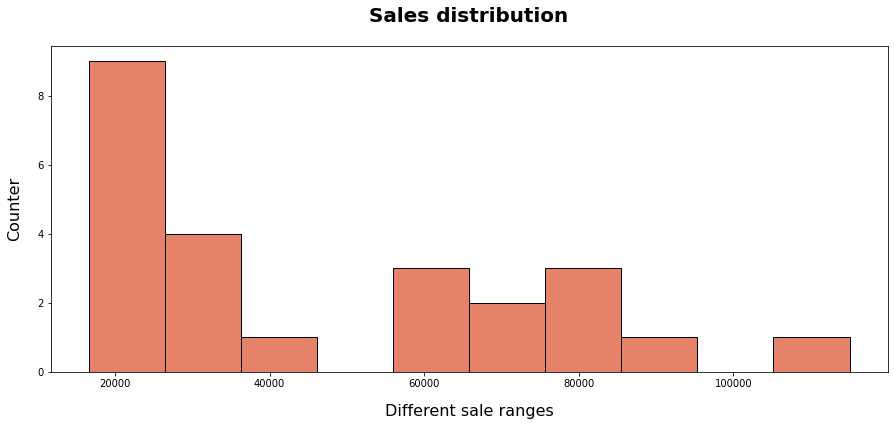

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(companies_without_walmart, x='Sales', color="#DF5838", bins=10)
plt.title('Sales distribution', family='avenir', weight="bold", size=20, pad=24)
plt.xlabel('Different sale ranges', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Counter', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 3. Para apreciar el resultado de una mejor manera ampliamos la imagen.

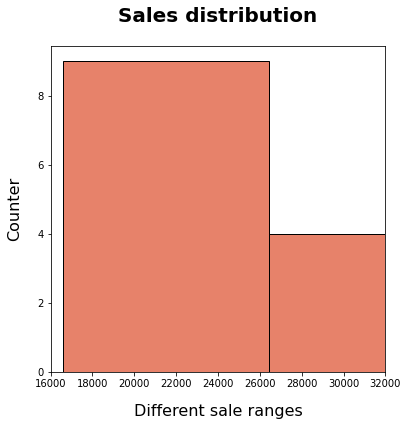

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(companies_without_walmart, x='Sales', color="#DF5838", bins=10)
plt.xlim(16000, 32000)
plt.title('Sales distribution', family='avenir', weight="bold", size=20, pad=24)
plt.xlabel('Different sale ranges', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Counter', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 4. Con esta visualización podemos concluir que, con 9 empresas en el rango, la mayoria de las compañías generaron alrededor de 17000 y 26000 ventas. 

#### Conclusiones:

- 🛒 la mayoria de las compañías generaron entre **17000 y 26000** ventas.
- 😮📑⬇ **El rango más común de ventas es al mismo el rango de menor número de ventas.** Esto quiere decir que **la mayor parte del top 25 empresas retail en Estados Unidos están vendiendo en el rango más bajo del top**. Bajo nuestra condición de empresa iniciante, tendremos mucha más competencia en ventas en los puestos más bajos del top que en otros puestos.
- 🧐 Es probable que, sabiendo el rango de ventas en donde está la mayoria de la competencia y considerando que somos una empresa iniciante en el rubro retail, **si competimos con las demas compañías de la lista, tendremos como minimo 17000 ventas.**


### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

#### 1. Nuevamente, para saber cuantas tiendas tiene la mayoria de las compañías podemos realizar una visualización que muestra diferentes rangos de número de tiendas y su ocurrencia en el sector retail.

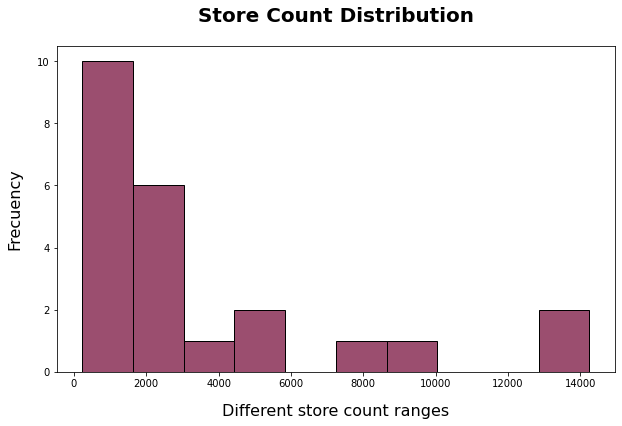

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df, x='Stores', color="#7A133F", bins=10)
plt.title('Store Count Distribution', family='avenir', weight="bold", size=20, pad=24)
plt.xlabel('Different store count ranges', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Frecuency', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 2. Para apreciar mejor el rango de n°tiendas de mayor frecuencia, ampliamos la imagen.

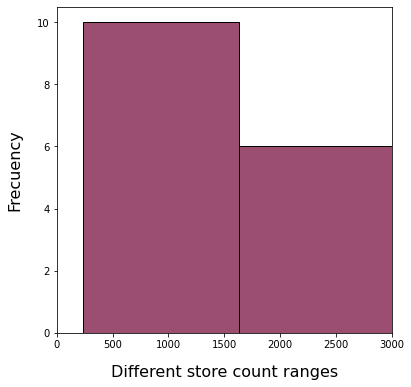

In [ ]:
plt.figure(figsize=(6,6))
stores = df['Stores']
sns.histplot(df, x='Stores', color="#7A133F", bins=10)
plt.xlim(0, 3000)
plt.xlabel('Different store count ranges', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Frecuency', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 3. Podemos ver que la mayoria de las compañías dentro del dataframe tienen entre 250 y 1400 tiendas. Siendo 12 compañías que se encuentran dentro de este rango de tiendas.

#### Conclusiones:
- 🏪 La competencia cuenta en su mayoria con, por lo menos, entre **250 y 1400 tiendas.** 
- 🔻 El rango de n°tiendas más frecuente es el rango de menor número de tiendas. Esto nos indica que **la mayor parte de la competencia no cuenta con una gran cantidad de tiendas**. Esto hace pensar que **para estar dentro del top de empresas retail no debemos hacer énfasis en la cantidad de tiendas disponibles.** 
- 😉🎯 Para competir al mismo nivel que la mayoria **no requeriremos de un número enorme de tiendas.**

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

#### 1. Para responder a la pregunta, debemos averiguar si ambas variables estan correlacionadas. Es decir, si el crecimiento de cantidad de tiendas crece proporcionalmente al crecimiento de las ventas.

#### 2. Para analizar la correlación entre variables realizamos la siguiente visualización en donde los valores diferentes a 1 son aquellos que indican la correlación entre las variables. Mientras más alto el valor más correlacionados están. Como este dataframe tiene valores nulos aplicamos un filtro para realizar correctamente la operación.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


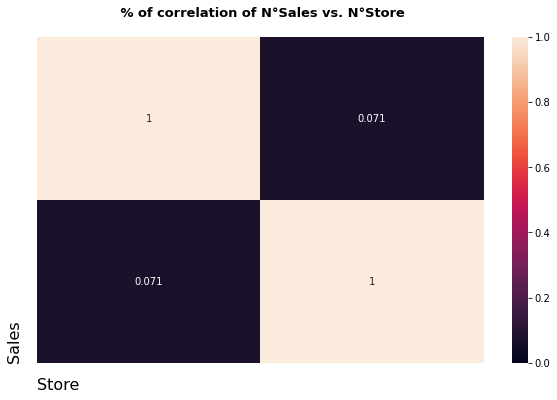

In [ ]:
df['Stores'] = df['Stores'].replace([np.NaN], 0) #Mapeamos los valores NaN por 0

correlation_matrix = np.corrcoef(df['Stores'],df['Sales'])

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True ,vmin=0, vmax=1, xticklabels=False, yticklabels=False)
plt.title(' % of correlation of N°Sales vs. N°Store', family='avenir', weight="bold", size=13, pad=20)
plt.xlabel('Store', family='avenir', weight="light", loc="left", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", loc="bottom", size=16, labelpad=15)
plt.show()

#### 2. Los coeficientes de correlación rozan el 7% lo que quiere decir que la relación de crecimiento entre tiendas y ventas es muy baja y que, por ende, la cantidad de tiendas NO está relacionada con la cantidad de ventas. Para ilustrarlo de una mejor manera realizamos la siguiente visualización.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


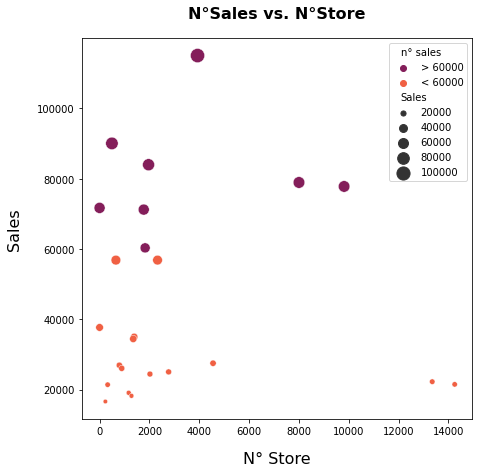

In [ ]:
plt.figure(figsize=(7,7))

df.insert(1, "n° sales", df['Sales'] > 60000, allow_duplicates=False) #Agregamos una columna temporal que indica si la empresa realizo más de 60000 ventas

df['n° sales'] = df['n° sales'].replace([False], '< 60000') #reemplazamos este valor booleano por su significado en el problema
df['n° sales'] = df['n° sales'].replace([True], '> 60000') 

sns.scatterplot(x='Stores', y='Sales', hue=df['n° sales'], size='Sales', sizes=(20,200) ,palette="rocket" ,data=df[1:])
plt.title('N°Sales vs. N°Store', family='avenir', weight="bold", size=16, pad=20)
plt.xlabel('N° Store', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

df = df.drop('n° sales', 1) #Eliminamos la columna

#### 3. Como se puede apreciar existen compañías que cuentan con aproximadamente 14000 tiendas y generan 20000 ventas. Mientras que otros casos, tan solo con 2000 tiendas generan más de 80000 ventas. Si hubiese correlación entre las variables, deberiamos ver que los puntos se encuentran alineados similarmente a lo siguiente. 

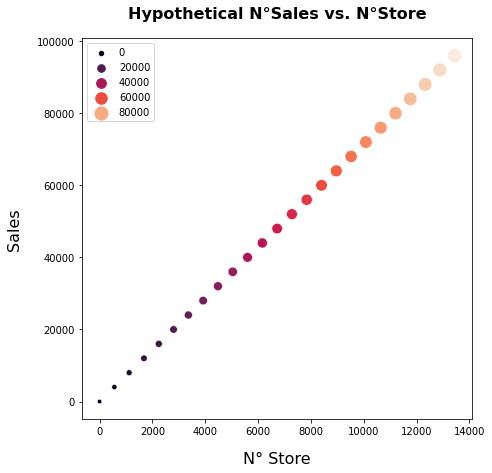

In [ ]:
hypothetical_N_Stores = [560*i for i in range(0, 25)] 
hypothetical_N_Sales =  [4000*i for i in range(0, 25)]

plt.figure(figsize=(7,7))
sns.scatterplot(x=hypothetical_N_Stores, y=hypothetical_N_Sales, hue=hypothetical_N_Sales, size=hypothetical_N_Sales,sizes=(20,200) ,palette="rocket")
plt.title('Hypothetical N°Sales vs. N°Store', family='avenir', weight="bold", size=16, pad=20)
plt.xlabel('N° Store', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 4.Queda demostrado que no existe correlación alguna entre la cantidad de tiendas y la cantidad de ventas.

#### Conclusiones: 
- ❌ **La cantidad de ventas no está relacionada con la cantidad de tiendas.**
- 🏪🔻 Al no estar relacionadas estas variables podemos asegurar que **no es necesario invertir en muchas tiendas para tener una buena cantidad de ventas.**
- 🛒😮 La visualización evidencia que **las compañías con menos de 2000 tiendas tienden a tener más ventas que aquellas que cuentan con muchas tiendas.** 
- 🧐🛒📈 Como empresa iniciante en el rubro puede ser conveniente **tener pocas tiendas para más ventas.**

### 5. ¿Cuál es el rango que existe entre las ventas?

#### 1. Para averiguar la respuesta a la respuesta, utilizaremos el dataframe de todas las compañías exceptuando a walmart, ya que, al ser un caso atipico en ventas, sesga el resultado del rango. 

In [ ]:


df_1 = _deepnote_execute_sql("""SELECT *
FROM companies_without_walmart
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Kroger,115037,3931.0,30.031850,0.053887,Grocery
1,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
2,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
3,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
4,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
5,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
6,Target,71208,1772.0,39.982033,-0.010056,Supercenters
7,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
8,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
9,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs


#### 2. Calculamos el rango restando el valor más alto con el más bajo.

In [ ]:
sales_range = companies_without_walmart['Sales'].max() - companies_without_walmart['Sales'].min()
print('Valor minimo de ventas: ',companies_without_walmart['Sales'].min())
print('Valor máximo en ventas: ',companies_without_walmart['Sales'].max())
print('El rango que existe entre las ventas es de:',sales_range)

Valor minimo de ventas:  16592
Valor máximo en ventas:  115037
El rango que existe entre las ventas es de: 98445


#### 3. Podemos ver que el rango entre las ventas es de 98445 unidades, donde el menor es 16592 y el mayor es 115037. Visualizamos este número mediante un diagrama de caja donde las lineas alargadas representan el menor valor y el mayor valor de las ventas. 

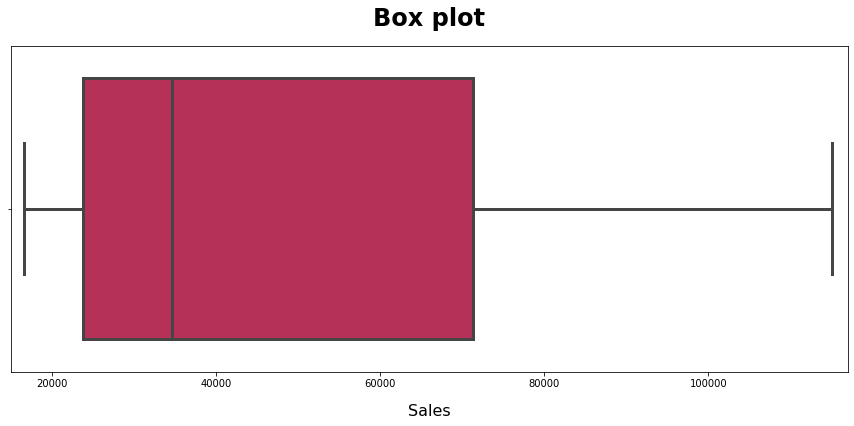

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Sales',data=companies_without_walmart, orient="h", linewidth=3, palette="rocket") 
plt.title('Box plot', family='avenir', weight="bold", size=24, pad=20)
plt.xlabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.xlim(15000, 117000)
plt.show()

#### Conclusiones:
- 📍 El rango de ventas es de **98445** unidades.
- ⬇🛒 Viendo el diagrama de caja podemos notar que **la distribución de ventas se inclina mucho por los valores que se encuentran entre los 16000 y 30000**. Concretamente estariamos posicionados entre el primer bigote y el vertice que corta la caja, siendo esta última la mediana. Esto nos indica nuevamente que **la competencia se encuentra vendiendo mayoritariamente entre este rango.**
- 📋💪 Para poder entrar dentro del top de empresas retail, **debemos generar, por lo menos, 16592 ventas.**
- 🛒🎯 Considerando que la empresa recien esta iniciando, **podemos realizar objetivos de ventas para llegar como minimo a las 16592 unidades y como mucho 115037.**

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

#### 1. Primero respondemos a la pregunta de cuáles son las 5 empresas con más tiendas, ordenando cada compañía de mayor cantidad de tiendas a menor.

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=0)
df_sorted_stores 

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
14,Rite Aid,27486,4553.0,6.025649,-0.003720,Drug Stores
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery


#### 2. Nos quedamos con los primeros 5 puestos que aparecen en el dataframe y realizamos una visualización para ver en perspectiva el número de tiendas.

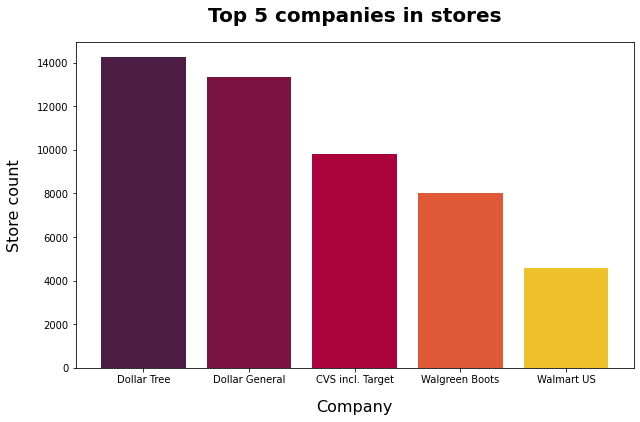

In [ ]:
top_5_stores = df_sorted_stores[0:5]
plt.figure(figsize=(10,6))
plt.bar(x=top_5_stores['Company'], height=top_5_stores['Stores'], align='center', color=['#4C1E45','#7A133F','#AA023A','#DF5838','#EFC12D'])
plt.title('Top 5 companies in stores', family='avenir', weight="bold", size=20, pad=20)
plt.xlabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Store count', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 3. Con esta visualización ya tenemos las 5 empresas con más tiendas fisicas. Siendo de mayor a menor: Dollar Tree, Dollar General, CVS incl. Target, Walgreen Boots y Walmart US.

#### 4. Para analizar si algunas empresas del top se encuentran también en el top 5 de ventas, realizamos dicho top, ordenando el dataset por ventas y extrayendo los primeros 5. Usaremos el dataset sin walmart por ser un caso atípico en ventas.

In [ ]:
companies_without_walmart = companies_without_walmart.sort_values('Sales',ascending=0)
top_5_sales = companies_without_walmart[0:5]
top_5_sales

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


#### 5. Realizamos la misma visualización pero para el top 5 de empresas que vendieron más.

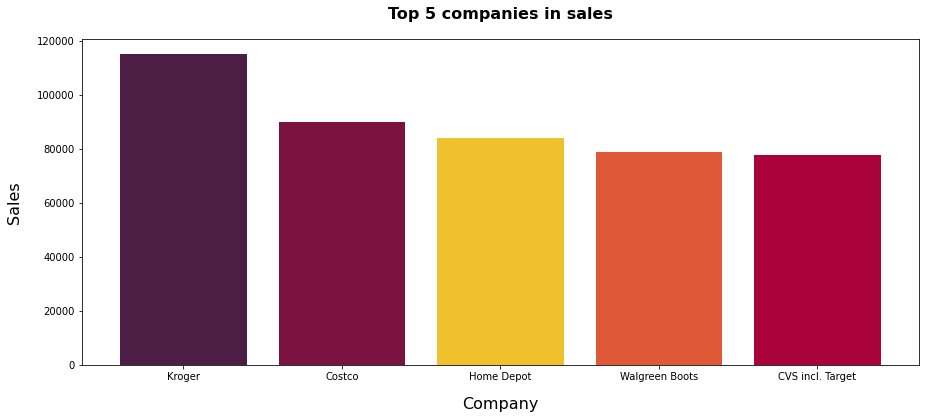

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=top_5_sales['Company'], height=top_5_sales['Sales'], align='center', color=['#4C1E45','#7A133F','#EFC12D','#DF5838','#AA023A'])
plt.title('Top 5 companies in sales', family='avenir', weight="bold", size=16, pad=20)
plt.xlabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### 6. Con esta visualización, sin contando a Walmart, obtenemos las 5 empresas con más ventas. Siendo de mayor a menor Kroger, Costco, Home Depot, Walgreen Boots y CVS incl. Target.

#### 7. Para identificar si alguna empresa se encuentra en ambos tops, observamos directamente las 2 visualizaciones en el mismo marco y diferenciamos por color a  aquellas que aparecen en ambos.

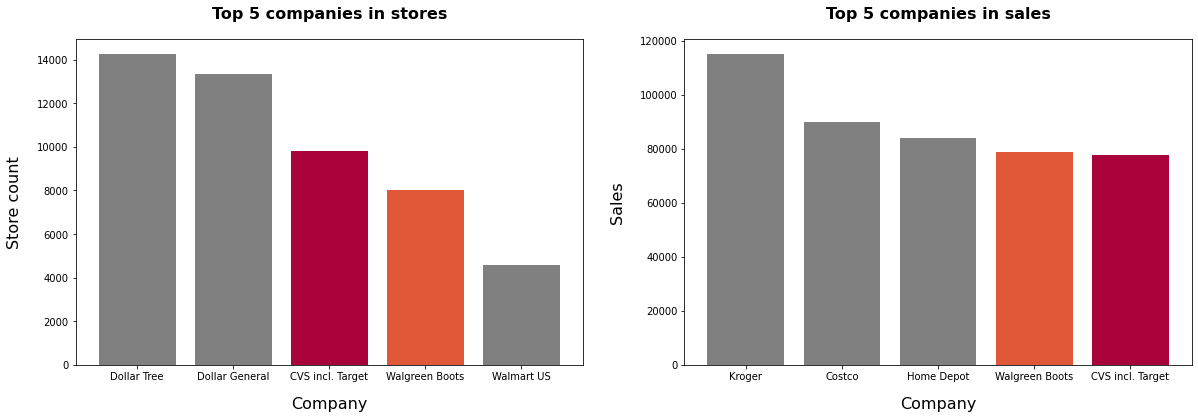

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)

plt.bar(x=top_5_stores['Company'], height=top_5_stores['Stores'], align='center', color=['grey','grey','#AA023A','#DF5838','grey'])
plt.title('Top 5 companies in stores', family='avenir', weight="bold", size=16, pad=20)
plt.xlabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Store count', family='avenir', weight="light", size=16, labelpad=15)

plt.subplot(1, 2, 2)

plt.bar(x=top_5_sales['Company'], height=top_5_sales['Sales'], align='center', color=['grey','grey','grey','#DF5838','#AA023A'])
plt.title('Top 5 companies in sales', family='avenir', weight="bold", size=16, pad=20)
plt.xlabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)

plt.show()

#### 8. Podemos apreciar que solamente Walgreen Boots y CVS incl. Target aparecen en ambos tops. Sin embargo sus posiciones son diferentes en cada caso. 

#### Conclusiones:
- 🥇🥇 Las empresas que aparecen en el top 5 de cantidad de tiendas y top 5 en ventas son **Walgreen Boots y CVS incl.**
- 🏪📉🛒 **A pesar de que CVS tiene una marcada diferencia en tiendas que Walgreen sus ventas no reflejan un crecimiento similar.** Incluso se posiciona detras de Walgreen. Este caso evidencia que **tener más cantidad de tiendas no significa necesariamente más ventas.** 
- ❌🏪 **Si agentes externos nos ofrecen un plan para aumentar las tiendas como promesa de que las ventas crecerán, es conveniente rechazarlo** debido a que contamos con el ejemplo de CVS que muestra lo contrario, sumado a que no existe una correlación entre las variables como vimos en la pregunta 4. 
- 🛒🏪📈 **Si realmente existiese una relación entre cantidad de tiendas y ventas entonces deberiamos ver que los 5 primeros en cantidad de tiendas son los mismos 5 primeros en ventas.**

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

#### 1. Para responder a la pregunta debemos agrupar las ventas por categoria y mostrar los primeros lugares del nuevo dataframe. 

In [ ]:
sales_per_category = df.groupby(['Category']).sum()
sales_per_category_sorted = sales_per_category.sort_values('Sales', ascending=0)
sales_per_category_sorted[0:5]

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Supercenters,745919,6577.0,180.370496,0.087294
Grocery,297164,12026.0,207.678590,0.157494
Drug Stores,184202,22368.0,24.662535,0.241432
Home Improvement,144287,3793.0,76.047670,0.019520
Electronic/Mail Order,109351,0.0,0.000000,0.000000


#### 2. Podemos ver que la categoría con más ventas es 'Supercenters' con un total de 745919 ventas. Para verlo con mayor claridad realizamos la siguiente visualización.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


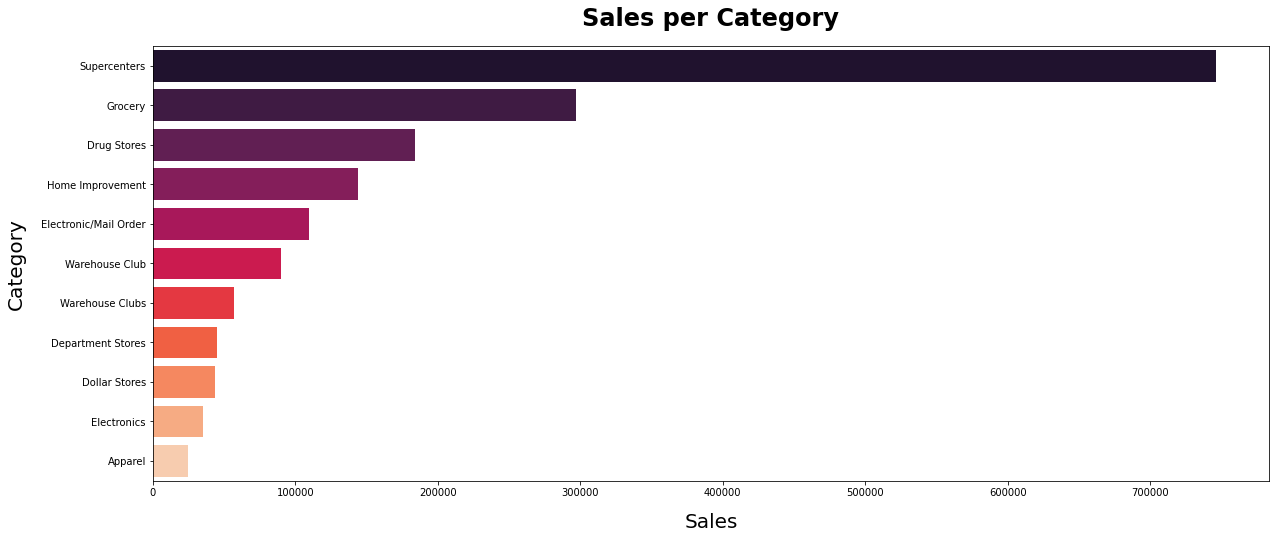

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Sales', y= sales_per_category_sorted.index ,saturation=10 ,palette="rocket",data=sales_per_category_sorted)
plt.title('Sales per Category', family='avenir', weight="bold", size=24, pad=20)
plt.xlabel('Sales', family='avenir', weight="light", size=20, labelpad=15)
plt.ylabel('Category', family='avenir', weight="light", size=20, labelpad=15)

plt.show()

#### Conclusiones: 
- 📈🛒 **'Supercenters' es la categoria que más ventas genera.**
- 🏆 Podemos observar que la categoría **'Supercenters' es, con mucha diferencia, la categoría dominante del sector retail.**
- 👑🛒 **Las cantidad de ventas de la categoria 'Supercenters' es similar a la cantidad de ventas de Walmart.** Esto indica que, en su totalidad, **la categoria está siendo ocupada casi monopolicamente por Walmart.**
- 🎯🏬 Si nuestro plan de negocio y propuesta de valor esta o se encuentra potencialmente relacionado con los productos que ofrece la categoría 'Supercenters', **podemos considerar pivotear a este tipo de categoría en la empresa para generar más ventas.** 

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

#### 1. Nuestro objetivo es saber cual es la compañía que, en función de la cantidad de tiendas que tiene, generó más ventas. Para eso ordenamos nuestro dataset de mayor a menor según 'Sales / Avg. Store', cuya interpretación numerica es el número aproximado de ventas que genero por cada tienda que tengo.

In [ ]:
df_sorted = df.sort_values('Sales/Avg. Store', ascending=0)
df_sorted

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
10,Sam's Club,56828,655.0,87.293395,0.012365,Warehouse Clubs
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
21,HEB,21384,323.0,66.825000,0.018927,Grocery
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
15,Ahold,26903,794.0,34.446863,0.033854,Grocery
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores


#### 2. Extraemos la primer fila y tenemos que la compañía con mejor relación ventas/tiendas es Costco.

In [ ]:
df_sorted[0:1]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.79562,0.06681,Warehouse Club


#### 3. Para más claridad, pongamos en perspectiva las relaciones mediante un diagrama de barras.

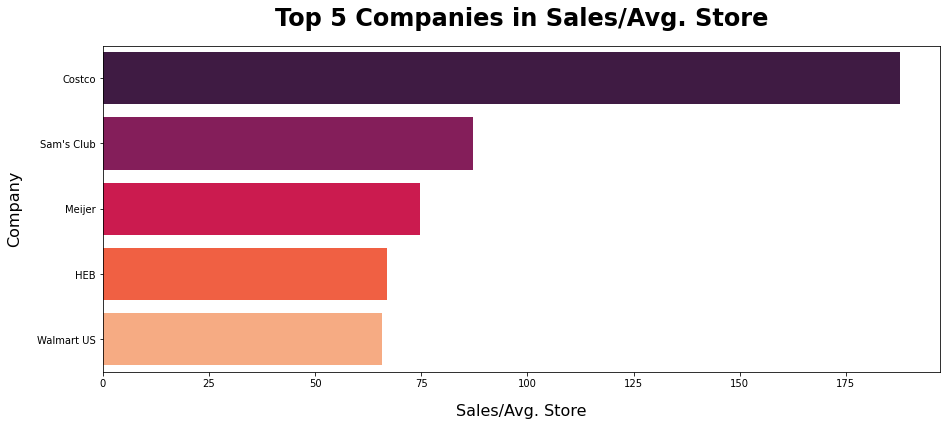

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Sales/Avg. Store', y='Company' ,saturation=10 ,palette="rocket",data=df_sorted[0:5])
plt.title('Top 5 Companies in Sales/Avg. Store', family='avenir', weight="bold", size=24, pad=20)
plt.xlabel('Sales/Avg. Store', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Company', family='avenir', weight="light", size=16, labelpad=15)

plt.show()

#### Conclusiones:
- 🏪🛒 Dado los resultados podemos suponer que **Cotsco vende 187 unidades por cada tienda que tiene.** 
- 🛒❌🏪 Podemos ver que en el diagrama existe una clara diferenciación numérica entre diferentes puestos. **Si las ventas estuviesen correlacionadas al N° tiendas deberiamos ver una similitud de alturas entre una barra.**
- 🤷‍♂️🤔 **Aunque parezca interesante los resultados presentados, no aporta significativamente a las decisiones del negocio** debido a que estamos en un mercado con número de tiendas y ventas no correlacionados.

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

#### 1. Primero averiguamos que compañías venden solamente online. Esto podemos averiguarlo si consideramos que, vender online implica no tener ninguna tienda fisica.

In [ ]:


df_2 = _deepnote_execute_sql("""SELECT *
FROM df 
WHERE Stores = 0 
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_2

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Amazon,71687,0.0,None,None,Electronic/Mail Order
1,Apple incl. Online,37664,0.0,None,None,Electronic/Mail Order


#### 2. Podemos ver que las empresas que venden exclusivamente online son Amazon y Apple inc. 

#### 3. Para comparar las ventas realizadas por las empresas online vs las que no son online (offline) realizamos un diagrama de barras.

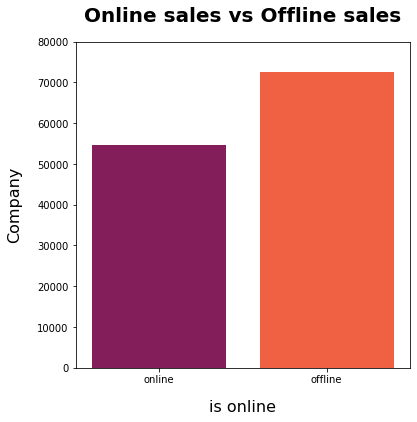

In [ ]:
plt.figure(figsize=(6,6))
df.insert(1, "is online", df['Stores'] == 0, allow_duplicates=False) #Agregamos una columna temporal que indica que empresa es online u offline

df['is online'] = df['is online'].replace([False], 'offline') #reemplazamos este valor booleano por su significado en el problema
df['is online'] = df['is online'].replace([True], 'online') 


sns.barplot( x= 'is online', y ='Sales',order=['online', 'offline'],saturation=10,data=df,palette="rocket", ci=None)
plt.ylim(0, 80000)
plt.title('Online sales vs Offline sales', family='avenir', weight="bold", size=20, pad=20)
plt.xlabel('is online', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Company', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

df = df.drop('is online', 1) #Eliminamos esta columna temporal

#### Conclusiones: 
- 📶🛒 **Existen 2 compañías de forma online en el sector retail y son Amazon y Apple. Sus ventas son destacables siendo tan solo 2 empresas en el mercado.**
- 💻🛒 Si bien las ventas empresas online no superan a las offline, es impresionante ver que **solo 2 empresas superan las 50000 ventas. Mientras que 23 empresas que cuentan con tiendas fisicas llegan a las 70000 unidades.**
- 👨‍💻💸 **Es probable que si distribuimos nuestro/producto servicio de forma online sin perder la propuesta valor, nuestras ventas aumentarían ya que para el cliente puede ser incluso más accesible tener su compra desde internet.**
- 📊💻 **Probablemente si tuviesemos en nuestro dataset un par más de grandes empresas retail que venden unicamente de forma online, las ventas superarian las offline.**

## III. Tus propias preguntas

### 10. ¿Cuál es la compañía que más creció en cantidad de tiendas? ¿Este crecimiento que tuvo impactó en sus ventas?

#### 1. Primero averiguamos cuál es la compañía que más creció en tiendas. Para eso ordenamos nuestro dataframe de mayor a menor en función del 'Store Count Growth', la cuál indica en porcentaje cuanto aumentó la cantidad de tiendas por empresa. Luego obtenemos la primer posición.

In [ ]:
df = df.sort_values('Store Count Growth', ascending=0)
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
18,Aldi,24402,2021.0,12.715998,0.112273,Grocery
24,Meijer,16592,231.0,74.738739,0.084507,Supercenters
16,Macy's,26028,889.0,30.442105,0.082826,Department Stores
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
17,TJX,25012,2770.0,9.369545,0.078241,Apparel
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
13,Publix,34408,1351.0,25.997733,0.042438,Grocery


In [ ]:
df[0:1]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


#### 2. Podemos ver que la compañía que más creció en de cantidad de tiendas es CVS incl. Target. Con un 25% respecto de la cantidad anterior. Curiosamente lo pudimos observar dentro del top 5 en ventas. Para comparar en perspectiva su posición en el top, realizamos la siguiente visualización que muestra el top 5 de las compañías que más crecieron en cantidad de tiendas.

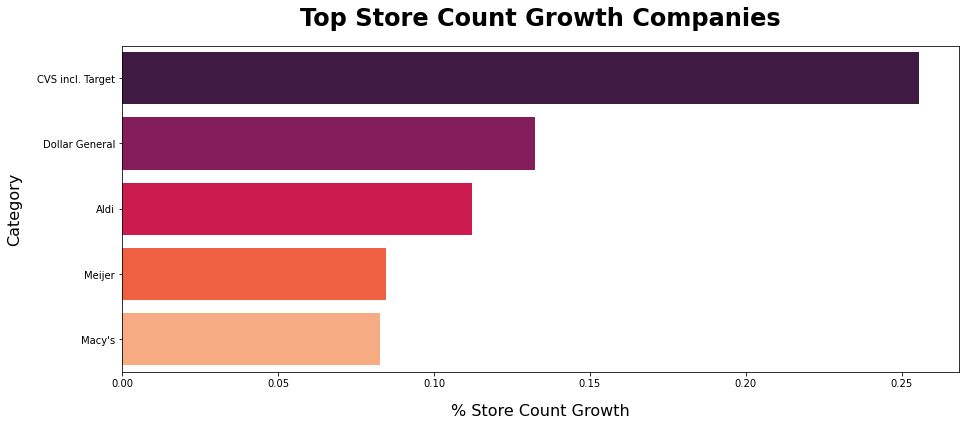

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Store Count Growth', y='Company' ,saturation=10 ,palette="rocket", ci=None, data=df[0:5])

plt.title('Top Store Count Growth Companies', family='avenir', weight="bold", size=24, pad=20)
plt.xlabel('% Store Count Growth', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Category', family='avenir', weight="light", size=16, labelpad=15)

plt.show()

#### 3. Sabiendo que CVS es la empresa que más invirtió a la hora de obtener más tiendas fisicas. Realizamos la comparación de ventas junto a todas las demas compañías observar su posición y medir el impacto generado por el 'Store Count Growth. 

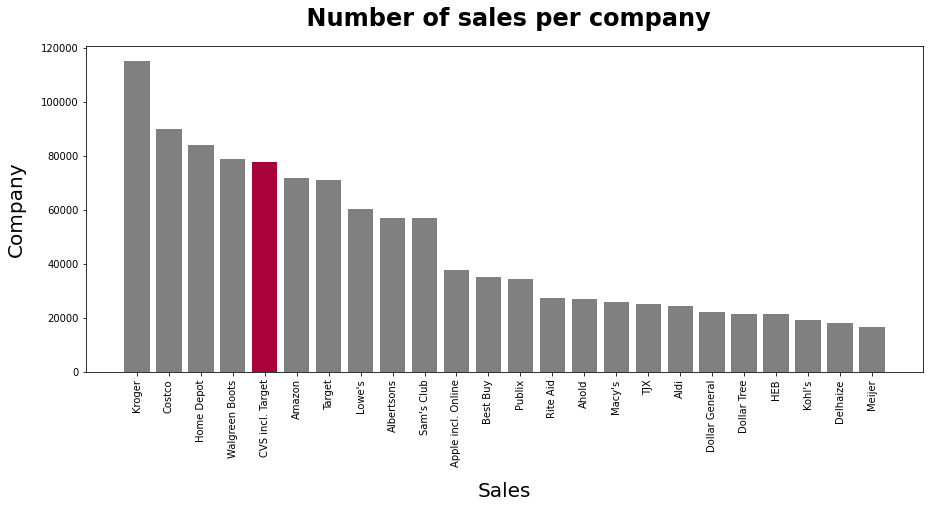

In [ ]:
plt.figure(figsize=(15, 6))
df = df.sort_values('Sales', ascending=0)

colors = ['grey' for i in range(25)]
colors[4] = '#AA023A'

plt.bar(x=df['Company'][1:], height=df['Sales'][1:], align='center', color=colors)

plt.title(' Number of sales per company', family='avenir', weight="bold", size=24 ,pad=20)
plt.xlabel('Sales', family='avenir', weight="light", size=20, labelpad=15)
plt.ylabel('Company', family='avenir', weight="light", size=20, labelpad=15)
plt.xticks(rotation='vertical')

plt.show()

#### 4. Finalmente obtenemos el resultado de ventas de CVS. Lo encontramos bien posicionado.

#### Conclusiones:

- 🏪📈 **La empresa que más creció en tiendas es CVS aumentando un 25% su cantidad.**
- 🏪📈🛒 **Es probable que el hecho de que CVS haya aumentado sus tiendas, haya aumentado las ventas.**
- 🏪⚖🛒 Aunque las ventas de CVS están bien posicionadas, **la posición entre ventas y crecimiento de tiendas son diferentes.**

### 11. ¿Cuál es el la categoría con el mayor porcentaje de compañías y cuál es la de mayor porcentaje de ventas tiene en el sector retail?

#### 1. Para responder a la pregunta agrupamos los datos del dataframe en categorias y contamos las compañías presentes en cada una.

In [ ]:
category_counter = df.groupby(['Category']).count()
category_counter.iloc[:,0:1]

,Company
Category,
Apparel,1
Department Stores,2
Dollar Stores,2
Drug Stores,3
Electronic/Mail Order,2
Electronics,1
Grocery,7
Home Improvement,2
Supercenters,3


#### 2. Esta información la guardamos de otra forma para asi observar mediante una visualización la categoria que más abarca en el sector retail. 

In [ ]:
indexs = category_counter.index
pie_category_companies = {indexs[i]:category_counter['Sales'][i] for i in range(11)}
print('Número de compañías por categoría: ',pie_category_companies)

Número de compañías por categoría:  {'Apparel': 1, 'Department Stores': 2, 'Dollar Stores': 2, 'Drug Stores': 3, 'Electronic/Mail Order': 2, 'Electronics': 1, 'Grocery': 7, 'Home Improvement': 2, 'Supercenters': 3, 'Warehouse Club': 1, 'Warehouse Clubs': 1}


#### 3. De la misma forma agrupamos y obtenemos la suma de las ventas por categoría.

In [ ]:
category_sales = df.groupby(['Category']).sum()

indexs = category_sales.index
pie_category_sales = {indexs[i]:category_sales['Sales'][i] for i in range(11)}
print('Ventas por categoría: ',pie_category_sales)

Ventas por categoría:  {'Apparel': 25012, 'Department Stores': 45088, 'Dollar Stores': 43698, 'Drug Stores': 184202, 'Electronic/Mail Order': 109351, 'Electronics': 34980, 'Grocery': 297164, 'Home Improvement': 144287, 'Supercenters': 745919, 'Warehouse Club': 90048, 'Warehouse Clubs': 56828}


#### 4. Realizamos la visualización para comparar cuantas tiendas existen en cada categoria y cuál es el % de mercado correspondiente. De la misma forma realizamos la visualización para ver las ventas por categoría.

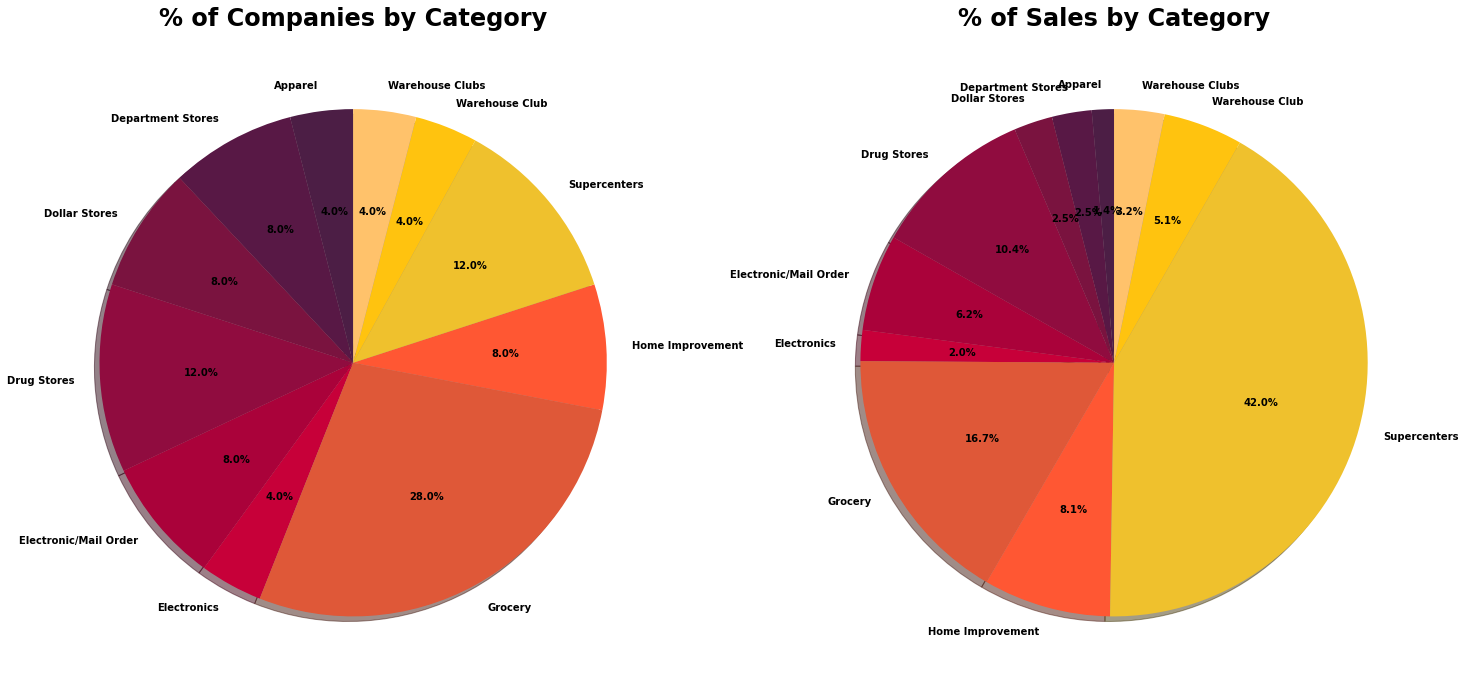

In [ ]:
plt.figure(figsize=(25,20))

color= ['#4C1E45','#581845', '#7A133F', '#900C3F','#AA023A', '#C70039' ,'#DF5838', '#FF5733','#EFC12D', '#FFC30F', '#FFC26B']

plt.subplot(1, 2, 1)


tp = { 'weight': 'bold'}
plt.title('% of Companies by Category', family='avenir', weight="bold", size=24, pad=20)
plt.pie(pie_category_companies.values(),startangle=90, textprops=tp ,labels=pie_category_companies.keys(), autopct='%1.1f%%',
        shadow=True, colors=color)

plt.subplot(1, 2, 2)

plt.title('% of Sales by Category', family='avenir', weight="bold", size=24, pad=20)
plt.pie(pie_category_sales.values(), labels=pie_category_sales.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90, textprops=tp,colors=color)

plt.show()

#### 5. Podemos apreciar que Grocery es la categoria con más compañías dentro por amplia diferencia. Teniendo el 28% de las empresas retail. Por otro lado, la categoria Supercenters tiene el 42% de las ventas en el sector retail.

#### Conclusiones:
- 🎯 **Grocery es la categoria en la que más compañías estan y Supercenters es la categoría que más vende.**
- 🥊⚡ **Al ser Grocery la categoría con más tiendas, la convierte en una categoría con mucha más competencia que en otros sectores del retail.**
- 🔫 Viendo la gráfica de '% of companies by Category' vemos que **los porcentajes de empresas en el mercado son más chicos que sus porcentajes de ventas respectivamente.** Esto puede indicar que **existe más competencia por las ventas en esos sectores que en los que no ocurre dicha observación.**  También puede indicar que simplemente el mercado para esos sectores es muy chico.
- 📉❌ **Existen categorías en la que no es rentable entrar debido a que el % de ventas respecto de la competencia es muy bajo.** Algunos ejemplos son Dollar Stores, Apparel y Departament Stores.
- 🧗‍♂️💎 Como empresa iniciante, con el fin de poder facilitarnos las ventas, **debemos posicionarnos en una categoria con poca competencia pero con % alto de ventas respecto del % de compañías.** Algunas opciones son Warehouse Club, Drug Stores y Supercenters.
- 💎🚀 **Supercenters puede ser una gran oportunidad para incursionar en el sector retail debido a su tamaño en el mercado y poca competencia.**

### 12. ¿Cuál es la categoría con más en cantidad de tiendas? ¿Cuál es la categoría con menos número de tiendas? ¿Existe una diferencia visible de ventas en ambas categorías?

#### 1. Comenzamos agrupando el dataframe por categorias y ordenamos por cantidad de tiendas de forma ascendente.

In [ ]:
group_by_category = df.groupby(['Category']).sum()
group_by_category = group_by_category.sort_values('Stores', ascending = 0)
group_by_category

,Sales,Stores,Sales/Avg. Store,Store Count Growth
Category,,,,
Dollar Stores,43698,27600.0,3.332804,0.212039
Drug Stores,184202,22368.0,24.662535,0.241432
Grocery,297164,12026.0,207.678590,0.157494
Supercenters,745919,6577.0,180.370496,0.087294
Home Improvement,144287,3793.0,76.047670,0.019520
Apparel,25012,2770.0,9.369545,0.078241
Department Stores,45088,2058.0,46.795602,0.088850
Electronics,34980,1389.0,24.685956,-0.038754
Warehouse Clubs,56828,655.0,87.293395,0.012365


#### 2. A partir del resultado obtenemos la primer y última posición.

In [ ]:
top_stores = group_by_category[0:1]
last_stores = group_by_category[-1:len(group_by_category.index)]

top_last_store_category = pd.DataFrame()
top_last_store_category = top_last_store_category.append(top_stores)
top_last_store_category = top_last_store_category.append(last_stores)

#### 3. Para averiguar el resultado final realizamos una visualización donde se compara en número de ventas la empresa con más tiendas vs la que no.

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


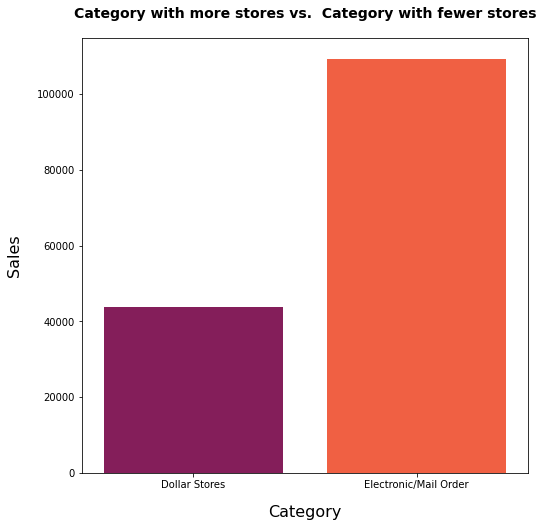

In [ ]:
plt.figure(figsize=(8,8))

sns.barplot(x=top_last_store_category.index, y ='Sales',saturation=10,data=top_last_store_category,palette="rocket", ci=None)
plt.title('Category with more stores vs.  Category with fewer stores', family='avenir', weight="bold", size=14, pad=20)
plt.xlabel('Category', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('Sales', family='avenir', weight="light", size=16, labelpad=15)
plt.show()



#### 4. Como podemos ver, la categoria con menor cantidad de tiendas es Electronic/Mail Order supera en ventas a Dollar Stores. Podemos concluir que las empresas con 0 tiendas generan más ventas que las que tienen más tiendas.

#### Conclusiones:
- 💻 **Las empresas retail con 0 tiendas generan más ventas que las que tienen más tiendas que la competencia.**
- 🛒 **Esta comparación evidencia aún más que las ventas online son más altas que las que tienen muchas tiendas. Esto puede resultarnos beneficioso siempre en cuando nuestro producto/servicio pueda adaptarse a una distribución online.**
- 😉 Podemos afirmar que **ser el N°1 en número de tiendas no garantiza que tengas muchas ventas en comparación a la competencia.**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3cad48-ea33-4876-b02b-d44b56771527' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>